## Importing the Dependences

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate

## Data Colection & Preprocessing 

In [2]:
start_end_data = []
for i in range(1, 34):
    file_path = f'{i}.xlsx'
    df = pd.read_excel(file_path, header=None)
    df = df.iloc[2:]
    start_end_data.append(df)
start_end_data = pd.concat(start_end_data, ignore_index=True)
# Set column headers
start_end_data.columns = ["StartX", "StartY", "GoalX", "GoalY"]

In [3]:
start_end_data.head()

,StartX,StartY,GoalX,GoalY
0,70.5,24.5,180,92.5
1,70.5,24.5,9.5,99.5
2,70.5,24.5,193.5,28.5
3,70.5,24.5,101.5,48.5
4,70.5,24.5,73.5,88.5


In [4]:
start_end_data.shape

(33, 4)

In [5]:
start_end_data.isnull().sum()

StartX    0
StartY    0
GoalX     0
GoalY     0
dtype: int64

In [6]:
scaler = MinMaxScaler()

In [7]:
start_end_vector = scaler.fit_transform(start_end_data)

In [8]:
print(start_end_vector[:33])

[[1.         0.         0.72291667 0.35652174]
 [1.         0.         0.0125     0.38695652]
 [1.         0.         0.77916667 0.07826087]
 [1.         0.         0.39583333 0.16521739]
 [1.         0.         0.27916667 0.33913043]
 [1.         0.         0.78333333 0.35652174]
 [1.         0.         0.425      0.50434783]
 [1.         0.         0.87916667 0.50434783]
 [1.         0.         0.01666667 0.79565217]
 [1.         0.         0.45416667 1.        ]
 [1.         0.         0.8        0.        ]
 [0.71212121 0.19277108 0.39166667 0.19130435]
 [0.71212121 0.19277108 0.025      0.34347826]
 [0.71212121 0.19277108 0.77916667 0.32608696]
 [0.71212121 0.19277108 0.77916667 0.12608696]
 [0.71212121 0.19277108 0.99583333 0.74347826]
 [0.71212121 0.19277108 0.         0.78695652]
 [0.71212121 0.19277108 0.45833333 0.5       ]
 [0.71212121 0.19277108 0.39166667 0.31304348]
 [0.71212121 0.19277108 0.39166667 0.09130435]
 [0.03030303 1.         0.39166667 0.09130435]
 [0.03030303 

In [9]:
nan_count = np.isnan(start_end_vector).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [10]:
path_data = {}
scaler = MinMaxScaler()
# Loop through the file names
for i in range(1, 34):
    file_name = f'path.{i}.xlsx'
    df = pd.read_excel(file_name)
    # Set the first row as the header and exclude it from the DataFrame
    df.columns = df.iloc[0]
    df = df[1:]
    # Normalize the 'X' and 'Y' columns within the DataFrame
    df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])
    # Store the modified DataFrame in the dictionary
    path_data[f'path_{i}'] = df

In [11]:
print(path_data['path_1'].head(167))

0           X         Y
1    0.000000  0.000000
2    0.009132  0.000000
3    0.018265  0.000000
4    0.027397  0.000000
5    0.036530  0.000000
..        ...       ...
161  0.963472  0.994958
162  0.972603  0.996247
163  0.981734  0.997535
164  0.990865  0.998824
165  1.000000  1.000000

[165 rows x 2 columns]


In [12]:
print(path_data['path_33'].head(100))

0           X         Y
1    0.000000  0.000000
2    0.008850  0.000000
3    0.017699  0.000000
4    0.026549  0.000000
5    0.035398  0.000000
..        ...       ...
96   0.159252  0.651641
97   0.159878  0.660023
98   0.160504  0.668405
99   0.161130  0.676788
100  0.161756  0.685170

[100 rows x 2 columns]


In [13]:
grid_size = (100, 100)
# Create an empty dictionary to store grid data
grid_data = {}
# Iterate through each path data
for i in range(1, 34):
    path_df = path_data[f'path_{i}']
    # Initialize the grid with zeros
    image_data = np.zeros(grid_size)
    # Populate the grid with path data
    for index, row in path_df.iterrows():
        x, y = int(row['X'] * (grid_size[0] - 1)), int(row['Y'] * (grid_size[1] - 1))
        if 0 <= x < grid_size[0] and 0 <= y < grid_size[1]:
            image_data[x, y] = 1  # Set grid cells corresponding to path points to 1
    # Store the grid data in the dictionary
    grid_data[f'grid_{i}'] = image_data

In [14]:
print(grid_data['grid_33'])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
# checking for the shape of each grid in grid_data
for grid_key, grid_array in grid_data.items():
    grid_shape = np.shape(grid_array)
    print(f'Shape of {grid_key}: {grid_shape}')

Shape of grid_1: (100, 100)
Shape of grid_2: (100, 100)
Shape of grid_3: (100, 100)
Shape of grid_4: (100, 100)
Shape of grid_5: (100, 100)
Shape of grid_6: (100, 100)
Shape of grid_7: (100, 100)
Shape of grid_8: (100, 100)
Shape of grid_9: (100, 100)
Shape of grid_10: (100, 100)
Shape of grid_11: (100, 100)
Shape of grid_12: (100, 100)
Shape of grid_13: (100, 100)
Shape of grid_14: (100, 100)
Shape of grid_15: (100, 100)
Shape of grid_16: (100, 100)
Shape of grid_17: (100, 100)
Shape of grid_18: (100, 100)
Shape of grid_19: (100, 100)
Shape of grid_20: (100, 100)
Shape of grid_21: (100, 100)
Shape of grid_22: (100, 100)
Shape of grid_23: (100, 100)
Shape of grid_24: (100, 100)
Shape of grid_25: (100, 100)
Shape of grid_26: (100, 100)
Shape of grid_27: (100, 100)
Shape of grid_28: (100, 100)
Shape of grid_29: (100, 100)
Shape of grid_30: (100, 100)
Shape of grid_31: (100, 100)
Shape of grid_32: (100, 100)
Shape of grid_33: (100, 100)


In [16]:
# check for missing values
for key, grid in grid_data.items():
    missing_values = np.isnan(grid).sum()
    print(f"Missing values in {key}: {missing_values}")

Missing values in grid_1: 0
Missing values in grid_2: 0
Missing values in grid_3: 0
Missing values in grid_4: 0
Missing values in grid_5: 0
Missing values in grid_6: 0
Missing values in grid_7: 0
Missing values in grid_8: 0
Missing values in grid_9: 0
Missing values in grid_10: 0
Missing values in grid_11: 0
Missing values in grid_12: 0
Missing values in grid_13: 0
Missing values in grid_14: 0
Missing values in grid_15: 0
Missing values in grid_16: 0
Missing values in grid_17: 0
Missing values in grid_18: 0
Missing values in grid_19: 0
Missing values in grid_20: 0
Missing values in grid_21: 0
Missing values in grid_22: 0
Missing values in grid_23: 0
Missing values in grid_24: 0
Missing values in grid_25: 0
Missing values in grid_26: 0
Missing values in grid_27: 0
Missing values in grid_28: 0
Missing values in grid_29: 0
Missing values in grid_30: 0
Missing values in grid_31: 0
Missing values in grid_32: 0
Missing values in grid_33: 0


## Path Visualization

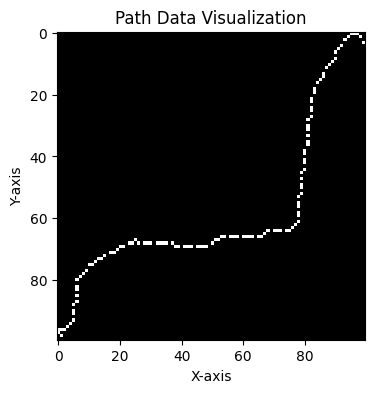

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(grid_data['grid_2'], cmap='gray')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Path Data Visualization')
plt.show()

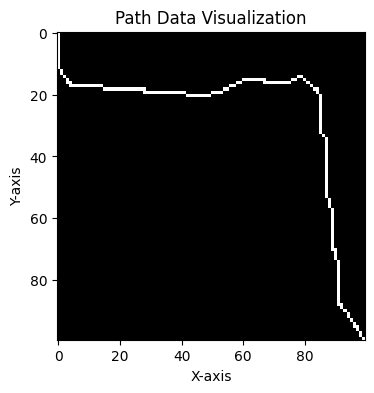

In [18]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(grid_data['grid_33'], cmap='gray')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Path Data Visualization')
plt.show()

## Optimal Path 

In [19]:
# Function to calculate the probability for each path based on the grid data
def calculate_path_probability(path_index, grid_data):
    path = grid_data[f'grid_{path_index}']
    # Calculate the probability as the fraction of path cells that are set to 1
    probability = np.sum(path) / np.prod(path.shape)
    return probability
# Calculate probabilities for each path
path_probabilities = [calculate_path_probability(i, grid_data) for i in range(1, 34)]
# Create a DataFrame with 'start_end_data' and the calculated probabilities
start_end_data['Optimal Probability'] = path_probabilities

In [20]:
start_end_data.head(10)

,StartX,StartY,GoalX,GoalY,Optimal Probability
0,70.5,24.5,180,92.5,0.0157
1,70.5,24.5,9.5,99.5,0.0121
2,70.5,24.5,193.5,28.5,0.0120
3,70.5,24.5,101.5,48.5,0.0051
4,70.5,24.5,73.5,88.5,0.0090
5,70.5,24.5,194.5,92.5,0.0159
6,70.5,24.5,108.5,126.5,0.0226
7,70.5,24.5,217.5,126.5,0.0189
8,70.5,24.5,10.5,193.5,0.0180
9,70.5,24.5,115.5,240.5,0.0242


In [21]:
path_probabilities_series = pd.Series(path_probabilities)
# Define the threshold for classifying paths
threshold = 0.01
# Create a new column 'Optimal Label' based on the threshold
start_end_data['Optimal Label'] = (path_probabilities_series >= threshold).astype(int)

In [22]:
start_end_data.head(10)

,StartX,StartY,GoalX,GoalY,Optimal Probability,Optimal Label
0,70.5,24.5,180,92.5,0.0157,1
1,70.5,24.5,9.5,99.5,0.0121,1
2,70.5,24.5,193.5,28.5,0.0120,1
3,70.5,24.5,101.5,48.5,0.0051,0
4,70.5,24.5,73.5,88.5,0.0090,0
5,70.5,24.5,194.5,92.5,0.0159,1
6,70.5,24.5,108.5,126.5,0.0226,1
7,70.5,24.5,217.5,126.5,0.0189,1
8,70.5,24.5,10.5,193.5,0.0180,1
9,70.5,24.5,115.5,240.5,0.0242,1


## Spliting Data

In [23]:
flattened_grids = []
start_end_vectors = []
for i, (grid_key, grid_array) in enumerate(grid_data.items()):
    # Flatten the grid_array
    flattened_grid = grid_array.flatten()
    flattened_grids.append(flattened_grid)
    start_end_vectors.append(start_end_vector[i])
# Convert the lists of flattened grids and start_end_vectors into NumPy arrays
X_grid = np.array(flattened_grids)
X_start_end = np.array(start_end_vectors)

## Train Test Split

In [24]:
y_train, y_test = train_test_split(start_end_data['Optimal Label'], test_size=0.4)

In [25]:
X_grid_train, X_grid_test, X_start_end_train, X_start_end_test, y_train, y_test = train_test_split(X_grid, X_start_end, start_end_data['Optimal Label'], test_size=0.4, random_state=42)

In [26]:
# Reshape X_grid to match the expected input shape of (100, 100, 1)
X_grid_train_reshaped = X_grid_train.reshape(-1, 100, 100, 1)
X_grid_test_reshaped = X_grid_test.reshape(-1, 100, 100, 1)

## Building CNN Model

In [27]:
# Define your CNN architecture for grid data
grid_input = Input(shape=(100, 100, 1))
grid_conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(grid_input)
grid_pool1 = MaxPooling2D(pool_size=(2, 2))(grid_conv1)
# Add more convolutional and pooling layers as needed
grid_flatten = Flatten()(grid_pool1)

# Define your model for start_end data
start_end_input = Input(shape=(4,))
# Add more layers if needed

# Merge the two paths
merged = concatenate([grid_flatten, start_end_input], axis=-1)

# Output layer
output = Dense(1, activation='sigmoid')(merged)

model_cnn = keras.Model(inputs=[grid_input, start_end_input], outputs=output)

In [28]:
# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model_CNN Evaluation

In [29]:
# Train the model
model_cnn.fit([X_grid_train_reshaped, X_start_end_train], y_train, epochs=10, batch_size=32, validation_data=([X_grid_test_reshaped, X_start_end_test], y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6855 - accuracy: 0.7895 - val_loss: 0.6167 - val_accuracy: 0.7857
Epoch 2/10
1/1 [==============================] - 0s 188ms/step - loss: 0.5173 - accuracy: 0.8947 - val_loss: 0.5262 - val_accuracy: 0.7857
Epoch 3/10
1/1 [==============================] - 0s 184ms/step - loss: 0.3853 - accuracy: 0.8947 - val_loss: 0.4611 - val_accuracy: 0.7857
Epoch 4/10
1/1 [==============================] - 0s 184ms/step - loss: 0.2907 - accuracy: 0.8421 - val_loss: 0.4315 - val_accuracy: 0.7857
Epoch 5/10
1/1 [==============================] - 0s 184ms/step - loss: 0.2325 - accuracy: 0.8421 - val_loss: 0.4401 - val_accuracy: 0.7857
Epoch 6/10
1/1 [==============================] - 0s 175ms/step - loss: 0.2024 - accuracy: 0.8421 - val_loss: 0.4457 - val_accuracy: 0.7857
Epoch 7/10
1/1 [==============================] - 0s 200ms/step - loss: 0.1783 - accuracy: 0.8421 - val_loss: 0.4341 - val_accuracy: 0.7857
Epoch 8/10
1/1 [=======

In [30]:
loss, accuracy = model_cnn.evaluate([X_grid_test_reshaped, X_start_end_test], y_test)

1/1 [==============================] - 0s 55ms/step - loss: 0.3621 - accuracy: 0.7857


## Saving Model 

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate

# Define your CNN model
def create_cnn_model(input_shape_grid, input_shape_start_end):
    # Define separate inputs for grid and start_end data
    grid_input = Input(shape=input_shape_grid)
    start_end_input = Input(shape=input_shape_start_end)
    
    # Define layers for grid data
    grid_conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(grid_input)
    grid_pool1 = MaxPooling2D(pool_size=(2, 2))(grid_conv1)
    grid_flatten = Flatten()(grid_pool1)
    
    # Merge the two paths
    merged = concatenate([grid_flatten, start_end_input], axis=-1)
    
    # Output layer
    output = Dense(1, activation='sigmoid')(merged)
    
    model = keras.Model(inputs=[grid_input, start_end_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN model with appropriate input shapes
input_shape_grid = (100, 100, 1)  # Input shape for grid data
input_shape_start_end = (4,)     # Input shape for start_end data
model_cnn = create_cnn_model(input_shape_grid, input_shape_start_end)

# Train your model with your training data
model_cnn.fit([X_grid_train_reshaped, X_start_end_train], y_train, epochs=10, batch_size=32, validation_data=([X_grid_test_reshaped, X_start_end_test], y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6877 - accuracy: 0.6842 - val_loss: 0.6057 - val_accuracy: 0.7857
Epoch 2/10
1/1 [==============================] - 0s 185ms/step - loss: 0.5163 - accuracy: 0.8947 - val_loss: 0.5216 - val_accuracy: 0.7857
Epoch 3/10
1/1 [==============================] - 0s 183ms/step - loss: 0.3828 - accuracy: 0.8947 - val_loss: 0.4620 - val_accuracy: 0.7857
Epoch 4/10
1/1 [==============================] - 0s 184ms/step - loss: 0.2873 - accuracy: 0.8421 - val_loss: 0.4353 - val_accuracy: 0.7857
Epoch 5/10
1/1 [==============================] - 0s 159ms/step - loss: 0.2281 - accuracy: 0.8421 - val_loss: 0.4469 - val_accuracy: 0.7857
Epoch 6/10
1/1 [==============================] - 0s 175ms/step - loss: 0.1971 - accuracy: 0.8421 - val_loss: 0.4544 - val_accuracy: 0.7857
Epoch 7/10
1/1 [==============================] - 0s 158ms/step - loss: 0.1723 - accuracy: 0.8421 - val_loss: 0.4430 - val_accuracy: 0.7857
Epoch 8/10
1/1 [=======

In [32]:
# Define and train your CNN model
model = create_cnn_model(input_shape_grid,input_shape_start_end)  

# Specify the path where you want to save your model
model_path = "D:/CNN_RRT/model.h5"

# Save the model to the specified path
model.save(model_path)

print(f"Model saved to {model_path}")

Model saved to D:/CNN_RRT/model.h5


C:\ProgramData\anaconda3\envs\Machine_Learning\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model_path = "D:/CNN_RRT/model.h5"

In [34]:
import tensorflow as tf
from tensorflow import keras

def load_trained_cnn_model(model_path):
    # Load your trained CNN model
    model = keras.models.load_model(model_path)

    return model

## Model Conversion

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import tensorflow_model_optimization as tfmot

In [39]:
# Load the Keras model
model = load_model('model.h5')

In [42]:
# Convert the model to Keras version 2.6.0
converted_model = tfmot.quantization.keras.quantize_model(model, 'int8')

In [50]:
# Save the converted model in the native Keras format
converted_model.save('model_converted.keras')